# Solutions for HW1

---

## 2.1 Coffee cooling program
### a) Determine Cooling Constant r

Newton's Law of cooling
\begin{eqnarray}
{dT\over dt} = -r(T-T_s)
\end{eqnarray}
Solving this simple differential equation, we get
\begin{eqnarray}
T(t) = Ce^{-rt} + T_s
\end{eqnarray}
where C and r are Constants. The problem for solving r becomes to fit the above funtion given the data. Columns in data file correspond to time, T for coffee, T-Ts for coffe, T for coffee with cream and T-Ts for coffee with cream.
Due to the measurement of error, T has error 0.1 and T-Ts has error 0.1$\sqrt{2}$ by error propagation.

To approximate cooling constant r, there are tow proposal solutions. Solution A: use difference equation to get sequence of r; solution B: fit data with function $T(t) = Ce^{-rt} + T_s$. For solution A, Forward and Back difference equations can be both used. For solution B, we will use linear and nonlinear fit methods.

The criterion for determining the best value of r would be calculation $\chi^2 $:
\begin{eqnarray}
\chi^2 = \sum_i (y_i-\bar y_i)^2
\end{eqnarray}
where $y_i$ is the temperature measured at time $t_i$ and $\bar y_i$ is estimated value.

In [9]:
import numpy as np
from lmfit import Model
from scipy.stats import chi2
import matplotlib.pyplot as plt

data = np.loadtxt('temp.dat')

t, y1, y2 = data[:,0], data[:,2], data[:,4] 
# t: time; y1: T-Ts for coffee; y2: T-Ts for coffee with cream

Ts = 17

chisquare = lambda f,x,y:((f(x)-y)**2).sum()

def Tt(C,r):
    return lambda x:C*np.exp(-r*x)

rchi = '{:7.5f} +/- {:7.5f} {:10.2f}     {:7.5f} +/- {:7.5f} {:10.2f}'

#### Solution A: using difference equation to solve r. 

In [10]:
def forward_diff(y,dt=2):
    dy = y[1:] - y[:-1]
    rs = -dy/y[:-1]/dt
    r = rs.mean()
    r_e = rs.std()
    return r, r_e

def back_diff(y,dt=2):
    dy = y[1:] - y[:-1]
    rs = -dy/y[1:]/dt
    r = rs.mean()
    r_e = rs.std()
    return r, r_e
    
r1_fwd, r1_fwd_e = forward_diff(y1)
chi21_fwd = chisquare(Tt(y1[0],r1_fwd),t,y1)

r2_fwd, r2_fwd_e = forward_diff(y2)
chi22_fwd = chisquare(Tt(y2[0],r2_fwd),t,y2)

r1_back, r1_back_e = back_diff(y1)
chi21_back = chisquare(Tt(y1[0],r1_back),t,y1)

r2_back, r2_back_e = back_diff(y2)
chi22_back = chisquare(Tt(y2[0],r2_back),t,y2)

# print('Method|12345678123456781234567812345678|12345678123456781234567812345678')
print('                      coffee                         coffee with cream')
print('-----------------------------------------------------------------------------')
print("                 r                  \u03C7^2               r                \u03C7^2")
print('Foward   ',rchi.format(r1_fwd,r1_fwd_e,chi21_fwd,r2_fwd,r2_fwd_e,chi22_fwd))
print('Back     ',rchi.format(r1_back,r1_back_e,chi21_back,r2_back,r2_back_e,chi22_back))

                      coffee                         coffee with cream
-----------------------------------------------------------------------------
                 r                  χ^2               r                χ^2
Foward    0.02261 +/- 0.00496     226.96     0.02087 +/- 0.00523     131.42
Back      0.02374 +/- 0.00547     134.27     0.02184 +/- 0.00580      83.19


#### Solution B: Nonlinear and Linear fit.

In [11]:
def fit(fun,x,y,weights=None):
    m=Model(fun, independent_vars=['x'])            
    result = m.fit(y, x=x, weights=weights)
    goodness=chi2.sf(result.chisqr,result.nfree)
    print(result.fit_report(show_correl=True,sort_pars=True))
    print('goodness: {}'.format(goodness))
    
    return result

def expfun(x,c=62,r=0.1):
    return c*np.exp(-r*x)

def linfun(x,c=3,r=0.1):
    return -r*x + c

logy1 = np.log(y1)
logy2 = np.log(y2)

[[Model]]
    Model(expfun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 24
    # variables        = 2
    chi-square         = 1790.86775
    reduced chi-square = 81.4030797
    Akaike info crit   = 107.497641
    Bayesian info crit = 109.853749
[[Variables]]
    c:  62.4835947 +/- 0.63197857 (1.01%) (init = 62)
    r:  0.02409282 +/- 5.3335e-04 (2.21%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, r) =  0.764

goodness: 0.0


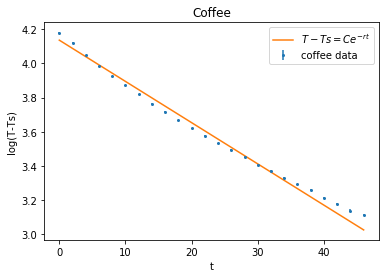

In [12]:
ye = 0.1*np.sqrt(2)
# ye is error of T-Ts

result = fit(expfun,t,y1,1/ye)

plt.errorbar(t,logy1,yerr=ye/y1,ls='None',marker='o',ms=2,label='coffee data')
plt.plot(t,np.log(result.best_fit),label=r'$T-Ts = Ce^{-rt}$')
plt.title('Coffee')
plt.xlabel('t')
plt.ylabel('log(T-Ts)')
plt.legend()
plt.show()

r1_nonlinear = result.params['r'].value
r1_nonlinear_e = result.params['r'].stderr
C1_nonlinear = result.params['c'].value
C1_nonlinear_e = result.params['c'].stderr
chi21_nonlinear = chisquare(Tt(C1_nonlinear,r1_nonlinear),t,y1)

[[Model]]
    Model(linfun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 24
    # variables        = 2
    chi-square         = 1823.56621
    reduced chi-square = 82.8893731
    Akaike info crit   = 107.931892
    Bayesian info crit = 110.287999
[[Variables]]
    c:  4.13581336 +/- 0.01002761 (0.24%) (init = 3)
    r:  0.02405842 +/- 5.2203e-04 (2.17%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, r) =  0.755

goodness: 0.0


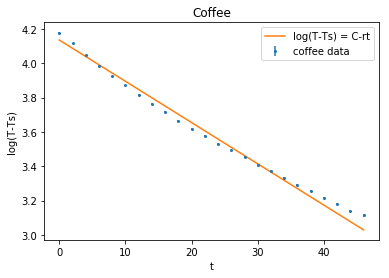

In [13]:
ye = 0.1*np.sqrt(2)/y1

result = fit(linfun,t,logy1,1/ye)

plt.errorbar(t,logy1,yerr=ye,ls='None',marker='o',ms=2,label='coffee data')
plt.plot(t,result.best_fit,label='log(T-Ts) = C-rt')
plt.title('Coffee')
plt.xlabel('t')
plt.ylabel('log(T-Ts)')
plt.legend()  
plt.show()

r1_linear = result.params['r'].value
r1_linear_e = result.params['r'].stderr
C1_linear = result.params['c'].value
C1_linear_e = result.params['c'].stderr
chi21_linear = chisquare(Tt(np.exp(C1_linear),r1_linear),t,y1)

[[Model]]
    Model(expfun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 24
    # variables        = 2
    chi-square         = 914.661451
    reduced chi-square = 41.5755205
    Akaike info crit   = 91.3720040
    Bayesian info crit = 93.7281117
[[Variables]]
    c:  49.0836032 +/- 0.44229624 (0.90%) (init = 62)
    r:  0.02152947 +/- 4.5616e-04 (2.12%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, r) =  0.774

goodness: 2.728414033201096e-179


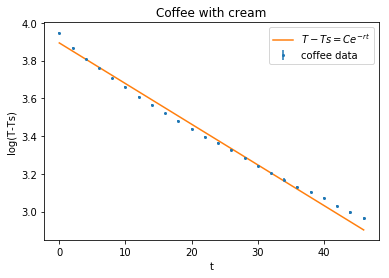

In [14]:
ye = 0.1*np.sqrt(2)
result = fit(expfun,t,y2,1/ye)

plt.errorbar(t,logy2,yerr=ye/y2,ls='None',marker='o',ms=2,label='coffee data')
plt.plot(t,np.log(result.best_fit),label=r'$T-Ts = Ce^{-rt}$')
plt.title('Coffee with cream')
plt.xlabel('t')
plt.ylabel('log(T-Ts)')
plt.legend()
plt.show()

r2_nonlinear = result.params['r'].value
r2_nonlinear_e = result.params['r'].stderr
C2_nonlinear = result.params['c'].value
C2_nonlinear_e = result.params['c'].stderr
chi22_nonlinear = chisquare(Tt(C2_nonlinear,r2_nonlinear),t,y2)

[[Model]]
    Model(linfun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 24
    # variables        = 2
    chi-square         = 1.1304e-05
    reduced chi-square = 5.1382e-07
    Akaike info crit   = -345.641602
    Bayesian info crit = -343.285494
[[Variables]]
    c:  3.85182186 +/- 0.01064664 (0.28%) (init = 3)
    r:  0.01973274 +/- 3.2621e-04 (1.65%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, r) =  0.924

goodness: 1.0


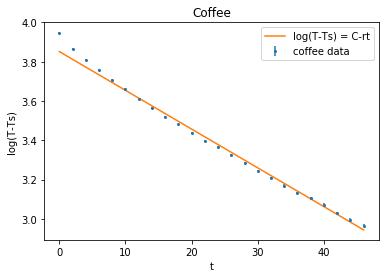

In [15]:
ye = 0.1*np.sqrt(2)/y2

result = fit(linfun,t,logy2,1/y2)

plt.errorbar(t,logy2,yerr=ye,ls='None',marker='o',ms=2,label='coffee data')
plt.plot(t,result.best_fit,label='log(T-Ts) = C-rt')
plt.title('Coffee')
plt.xlabel('t')
plt.ylabel('log(T-Ts)')
plt.legend()  
plt.show()

r2_linear = result.params['r'].value
r2_linear_e = result.params['r'].stderr
C2_linear = result.params['c'].value
C2_linear_e = result.params['c'].stderr
chi22_linear = chisquare(Tt(np.exp(C2_linear),r2_linear),t,y2)

#### Summary for solution A and B
From results of $\chi^2$ below, we find that Back difference work better than forward difference and fitting better than difference. 

In [26]:
print('                      coffee                         coffee with cream')
print('-----------------------------------------------------------------------------')
print("                 r                  \u03C7^2               r                \u03C7^2")
print('Foward   ',rchi.format(r1_fwd,r1_fwd_e,chi21_fwd,r2_fwd,r2_fwd_e,chi22_fwd))
print('Back     ',rchi.format(r1_back,r1_back_e,chi21_back,r2_back,r2_back_e,chi22_back))
print('Nonlinear',rchi.format(r1_nonlinear,r1_nonlinear_e,chi21_nonlinear,
                              r2_nonlinear,r2_nonlinear_e,chi22_nonlinear))
print('Linear   ',rchi.format(r1_linear,r1_linear_e,chi21_linear,r2_linear,r2_linear_e,chi22_linear))

                      coffee                         coffee with cream
-----------------------------------------------------------------------------
                 r                  χ^2               r                χ^2
Foward    0.02261 +/- 0.00496     226.96     0.02087 +/- 0.00523     131.42
Back      0.02374 +/- 0.00547     134.27     0.02184 +/- 0.00580      83.19
Nonlinear 0.02409 +/- 0.00053      35.82     0.02153 +/- 0.00046      18.29
Linear    0.02406 +/- 0.00052      35.90     0.01973 +/- 0.00033      35.64


### c) Significance of $\Delta t$
Set $\Delta t = 0.01, 0.1, 0.2$, we estimate errors of $\Delta T$

In [17]:
import math
def Euler(x,y,f,dx):
    y += f(x,y)*dx
    x += dx
    return x,y

def cooling(x0,y0,dt,r,ytrue,tmax,tshow=2):
    x, y = x0,y0
    nshow = math.ceil(tshow/dt)
    T = lambda x: ytrue[0]*np.exp(-r*x)
    f = lambda x,y: -r*y
    output='Step {:3d}: x = {:7.4f}, y_euler = {:.4f}, y_fun = {:.4f}, y_obs = {:.4f}, y_fun - y_euler = {:7.4f}'
    i = 0
    while (x<t[-1]):
        Tx=T(x)
        if i%nshow==0:print(output.format(i,x,y,Tx,ytrue[i//nshow],y-Tx))
        i += 1
        x, y = Euler(x,y,f,dt)

In [18]:
cooling(0,y1[0],0.01,r1_linear,y1,t[-1])

Step   0: x =  0.0000, y_euler = 65.3000, y_fun = 65.3000, y_obs = 65.3000, y_fun - y_euler =  0.0000
Step 200: x =  2.0000, y_euler = 62.2320, y_fun = 62.2324, y_obs = 61.5000, y_fun - y_euler = -0.0004
Step 400: x =  4.0000, y_euler = 59.3082, y_fun = 59.3088, y_obs = 57.3000, y_fun - y_euler = -0.0007
Step 600: x =  6.0000, y_euler = 56.5217, y_fun = 56.5227, y_obs = 53.7000, y_fun - y_euler = -0.0010
Step 800: x =  8.0000, y_euler = 53.8661, y_fun = 53.8674, y_obs = 50.6000, y_fun - y_euler = -0.0012
Step 1000: x = 10.0000, y_euler = 51.3353, y_fun = 51.3368, y_obs = 48.0000, y_fun - y_euler = -0.0015
Step 1200: x = 12.0000, y_euler = 48.9234, y_fun = 48.9251, y_obs = 45.5000, y_fun - y_euler = -0.0017
Step 1400: x = 14.0000, y_euler = 46.6248, y_fun = 46.6267, y_obs = 43.1000, y_fun - y_euler = -0.0019
Step 1600: x = 16.0000, y_euler = 44.4343, y_fun = 44.4363, y_obs = 41.1000, y_fun - y_euler = -0.0021
Step 1800: x = 18.0000, y_euler = 42.3466, y_fun = 42.3488, y_obs = 39.1000, y

In [19]:
cooling(0,y1[0],0.1,r1_linear,y1,t[-1])

Step   0: x =  0.0000, y_euler = 65.3000, y_fun = 65.3000, y_obs = 65.3000, y_fun - y_euler =  0.0000
Step  20: x =  2.0000, y_euler = 62.2288, y_fun = 62.2324, y_obs = 61.5000, y_fun - y_euler = -0.0036
Step  40: x =  4.0000, y_euler = 59.3020, y_fun = 59.3088, y_obs = 57.3000, y_fun - y_euler = -0.0069
Step  60: x =  6.0000, y_euler = 56.5128, y_fun = 56.5227, y_obs = 53.7000, y_fun - y_euler = -0.0098
Step  80: x =  8.0000, y_euler = 53.8549, y_fun = 53.8674, y_obs = 50.6000, y_fun - y_euler = -0.0125
Step 100: x = 10.0000, y_euler = 51.3219, y_fun = 51.3368, y_obs = 48.0000, y_fun - y_euler = -0.0149
Step 120: x = 12.0000, y_euler = 48.9081, y_fun = 48.9251, y_obs = 45.5000, y_fun - y_euler = -0.0170
Step 140: x = 14.0000, y_euler = 46.6078, y_fun = 46.6267, y_obs = 43.1000, y_fun - y_euler = -0.0189
Step 160: x = 16.0000, y_euler = 44.4157, y_fun = 44.4363, y_obs = 41.1000, y_fun - y_euler = -0.0206
Step 180: x = 18.0000, y_euler = 42.3267, y_fun = 42.3488, y_obs = 39.1000, y_fun 

In [20]:
cooling(0,y1[0],0.2,r1_linear,y1,t[-1])

Step   0: x =  0.0000, y_euler = 65.3000, y_fun = 65.3000, y_obs = 65.3000, y_fun - y_euler =  0.0000
Step  10: x =  2.0000, y_euler = 62.2251, y_fun = 62.2324, y_obs = 61.5000, y_fun - y_euler = -0.0072
Step  20: x =  4.0000, y_euler = 59.2951, y_fun = 59.3088, y_obs = 57.3000, y_fun - y_euler = -0.0138
Step  30: x =  6.0000, y_euler = 56.5030, y_fun = 56.5227, y_obs = 53.7000, y_fun - y_euler = -0.0197
Step  40: x =  8.0000, y_euler = 53.8423, y_fun = 53.8674, y_obs = 50.6000, y_fun - y_euler = -0.0250
Step  50: x = 10.0000, y_euler = 51.3070, y_fun = 51.3368, y_obs = 48.0000, y_fun - y_euler = -0.0298
Step  60: x = 12.0000, y_euler = 48.8910, y_fun = 48.9251, y_obs = 45.5000, y_fun - y_euler = -0.0341
Step  70: x = 14.0000, y_euler = 46.5888, y_fun = 46.6267, y_obs = 43.1000, y_fun - y_euler = -0.0379
Step  80: x = 16.0000, y_euler = 44.3951, y_fun = 44.4363, y_obs = 41.1000, y_fun - y_euler = -0.0413
Step  90: x = 18.0000, y_euler = 42.3046, y_fun = 42.3488, y_obs = 39.1000, y_fun 

\begin{eqnarray}
\Delta t = 0.01, \Delta T \approx 0.003 \\
\Delta t = 0.1 , \Delta T \approx 0.03 \\
\Delta t = 0.2 , \Delta T \approx 0.06 \\
\Delta t \propto 0.3 \Delta T
\end{eqnarray}

### d) cooling time

Let $T^\prime = T-Ts$, by using equation $T - T_s = Ce^{-rt} $, we get

\begin{eqnarray}
ratio = {T^\prime(0) \over T^\prime(t)} = e^{rt} \\
t = log(ratio)/r
\end{eqnarray}

Thus, for each difference, it will take
\begin{eqnarray}
ratio = 2, t = log(2)/r = 28.8 min \\
ratio = 4, t = log(4)/r = 57.6 min \\
ratio = 8, t = log(8)/r = 86.4 min \\
\end{eqnarray}

In [21]:
ln2=np.log(2)
dln2br=ln2/r1_linear

print(dln2br,2*dln2br,3*dln2br)

28.810997993629353 57.62199598725871 86.43299398088806


### e) Modifications

Use quadratic polynomial to subtitute linnear funtion to fit: 
\begin{eqnarray}
T(t) = e^{c-rt+at^2} + T_s
\end{eqnarray}

[[Model]]
    Model(polyfun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 24
    # variables        = 3
    chi-square         = 96.1838684
    reduced chi-square = 4.58018421
    Akaike info crit   = 39.3169878
    Bayesian info crit = 42.8511493
[[Variables]]
    a:  1.9162e-04 +/- 9.8671e-06 (5.15%) (init = 0.1)
    c:  4.17333673 +/- 0.00304788 (0.07%) (init = 3)
    r:  0.03152233 +/- 4.0345e-04 (1.28%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, r) =  0.953
    C(c, r) =  0.781
    C(a, c) =  0.634

goodness: 1.3560108968767107e-11


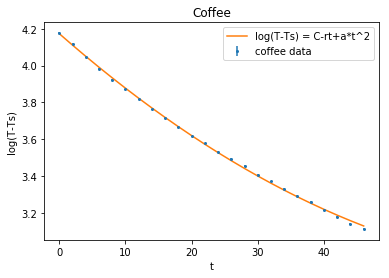

χ^2 for quadratic polynomial :    1.926


In [22]:
def polyfun(x,c=3,r=0.1,a=0.1):
    return -r*x + c + a*x**2

ye = 0.1*np.sqrt(2)/y1

result = fit(polyfun,t,logy1,1/ye)

plt.errorbar(t,logy1,yerr=ye,ls='None',marker='o',ms=2,label='coffee data')
plt.plot(t,result.best_fit,label='log(T-Ts) = C-rt+a*t^2')
plt.title('Coffee')
plt.xlabel('t')
plt.ylabel('log(T-Ts)')
plt.legend()  
plt.show()

def Tt1(c,r,a):
    return lambda x:np.exp(c-r*x+a*x**2)

r1_poly = result.params['r'].value
r1_poly_e = result.params['r'].stderr
C1_poly = result.params['c'].value
C1_poly_e = result.params['c'].stderr
a = result.params['a'].value
chi21_poly = chisquare(Tt1(C1_poly,r1_poly,a),t,y1)

print("\u03C7^2 for quadratic polynomial : {:8.3f}".format(chi21_poly))

### f) visualize the change of coffee temperature

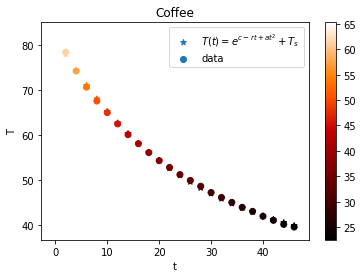

In [23]:
fun = Tt1(C1_poly,r1_poly,a)
t1=np.linspace(t[0], t[-1], num=100)
y3 = fun(t)
plt.scatter(t,y3+Ts,c=y3,cmap='gist_heat',marker='*',label="$T(t) = e^{c-rt+at^2} + T_s$")
plt.scatter(t,y1+Ts,c=y1,cmap='gist_heat',marker='o',label='data')
plt.title('Coffee')
plt.xlabel('t')
plt.ylabel('T')
plt.legend()
plt.colorbar()
plt.show()

## 2.2 Is it faster to add cream first or later?

Suppose we add cream after t_1 mins to reach temperature $T_1$ and take t_2 mins to reach sipped tempterature $T_{end}$. From question d), we get
\begin{eqnarray}
T_1 - T_s = (T_{start}-T_s) e^{-r_1 t_1} \\
T_{end} - T_s = (T_1 - T_s - \Delta T) e^{-r_2 t_2}
\end{eqnarray}

Then we can get funtion of total time needed to spend with $t_1$
\begin{eqnarray}
t_{total} &=& t_1 + t_2 \\
&=& t_1 + log({T_1 - T_s + \Delta T \over T_{end}-T_s})/r_2 \\
&=& t_1 + log({(T_{start}-T_s) e^{-r_1 t_1} - \Delta T \over T_{end}-T_s})/r_2
\end{eqnarray}
Suggest $t_2 \ge 0$, the up boundrary of $t_1$ would be
\begin{eqnarray}
t_{1up} = log({T_{start}-T_s \over T_{end}-T_s + \Delta T})/r_1
\end{eqnarray}

Fix $\Delta T = 8$, plot function $t_{total}$ of $t_1$:

t1up =  10.20365918752102


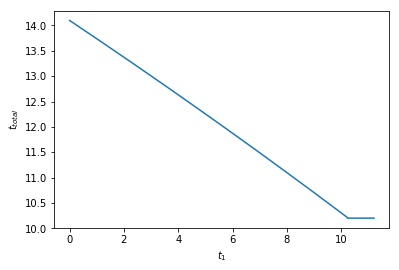

t_min = 10.227965144163333


In [24]:
r1, r2 = r1_nonlinear, r2_nonlinear
Tstart = 95
Tt1 = Tt(C1_nonlinear,r1_nonlinear)
Tt2 = Tt(C2_nonlinear,r2_nonlinear)
Tend = 70
dT = 8

def time(t1,r1,r2,Tstart=95,Tend=70,dT=8,Ts=Ts):
    # t0: add cream after t0 mins
    ratio = ((Tstart-Ts)*np.exp(-r1*t1) - dT)/(Tend-Ts)
    mask = ratio>1
    return mask*(t1 + np.log(ratio)/r2)+ (1- mask)*up(Tstart=Tstart,Tend=Tend,dT=dT,Ts=Ts)

def up(Tstart=95,Tend=70,dT=8,Ts=Ts):
    return np.log((Tstart-Ts)/(Tend-Ts+dT))/r1

tup = up()
print("t1up = ", up())
t1 = np.linspace(0,tup+1,1000)

ttotal = time(t1,r1_linear, r2_linear,dT=8)
plt.plot(t1,ttotal)
plt.xlabel('$t_1$')
plt.ylabel('$t_{total}$')
plt.show()

print("t_min =", t1[np.argmin(ttotal)])

We see that it is faster to add cream at the end. Then we discuss about dependence on the valule of $\Delta T$. To vary $\Delta T$ from 0 to 25, we use above formula to get total minimal time and compare it to situation of adding cream first or at the end. 

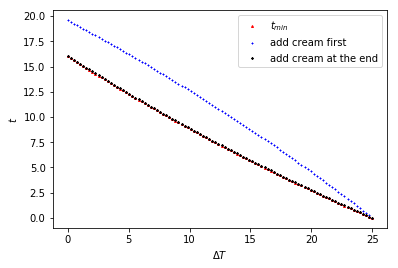

In [25]:
dTs = np.linspace(0,25,100)

t_min = np.zeros(dTs.shape[0])
t_first = np.zeros(dTs.shape[0])
t_after = np.zeros(dTs.shape[0])

for i in range(dTs.shape[0]):
    tup = up(dT=dTs[i])
    t1 = np.linspace(0,tup,1000)
    ttotal = time(t1,r1_linear, r2_linear,dT=dTs[i])
    t_min[i] = t1[np.argmin(ttotal)]
    t_first[i] = ttotal[0]
    t_after[i] = ttotal[-1]

plt.plot(dTs,t_min,label='$t_{min}$',ls='None',marker='^',ms=2,color='red')
plt.plot(dTs,t_first,label='add cream first',ls='None',marker='+',ms=2,color='blue')
plt.plot(dTs,t_after,label='add cream at the end',ls='None',marker='*',ms=2,color='black')
plt.xlabel('$\Delta T$')
plt.ylabel('$t$')
plt.legend()
plt.show()

We see that adding cream at the end always spends minist time from lab experiment. By taking partial of $t_{total}$ respect to $t_1$,
\begin{eqnarray}
{\partial t_{total} \over \partial t_{1}} = 1 - {r_1 \over r_2} {(T_{start} - T_s )e^{-r_1 t_1} \over (T_{start} - T_s )e^{-r_1 t_1} - \Delta T}
\end{eqnarray}
Because ${r_1 \over r_2}>1$ and 
${(T_{start} - T_s )e^{-r_1 t_1} \over (T_{start} - T_s )e^{-r_1 t_1} - \Delta T}>1$, we can get 
${\partial t_{total} \over \partial t_{total}}<0$ and $t_{total}$ decrease monotonically with $t_1$. Hence, we conclude that adding cream at the end always spends minist time.

## 3. Comparision of algorithm

### a) Euler, the Euler-Cromer, and the Euler-Richardson algorithms

Falling objects:
\begin{eqnarray}
v(t) &=& v_0 - gt \\
y(t) &=& y_0 + v_0 t - {1\over 2} gt^2
\end{eqnarray}

Euler Method:
\begin{eqnarray}
t_n &=& t_{n-1} + \Delta t \\
v_{n+1} &=& v_n + a_n \Delta t \\
y_{n+1} &=& y_n + v_n \Delta t \\
\end{eqnarray}

Euler-Cromer Method:
\begin{eqnarray}
t_n &=& t_{n-1} + \Delta t \\
v_{n+1} &=& v_n + a_n \Delta t \\
y_{n+1} &=& y_n + v_{n+1} \Delta t \\
\end{eqnarray}

Euler-Richardson Method:
\begin{eqnarray}
t_n &=& t_{n-1} + \Delta t \\
v_{mid} &=& v_n + a_n \Delta t/2 \\
y_{mid} &=& y_n + v_n \Delta t/2 \\
v_{n+1} &=& v_n + a_{mid} \Delta t \\
y_{n+1} &=& y_n + v_{mid} \Delta t \\
\end{eqnarray}

In [133]:
euler_basic = lambda x,y,dx,fun: y+fun(x)*dx
euler_cromer_basic = lambda x,y,dx,fun: y+fun(x+dx)*dx

fa = lambda x,v,t: -9.8

falling_exact = lambda t,x=30,v=0:x+v*t-0.5*9.8*t**2 

def euler(t,x,v,dt,fa):
    t1 = t + dt
    v1 = v + fa(x,v,t)*dt
    x1 = x + v*dt
    return t1,x1,v1

def euler_cromer(t,x,v,dt,fa):
    t1 = t + dt
    v1 = v + fa(x,v,t)*dt
    x1 = x + v1*dt
    return t1,x1,v1

def euler_richardson(t,x,v,dt,fa):
    t1 = t + dt
    tmid = t + dt/2
    vmid = v + fa(x,v,t)*dt/2
    xmid = x + v*dt/2
    v1 = v + fa(xmid,vmid,tmid)*dt
    x1 = x + vmid*dt
    return t1,x1,v1
    
def falling(dt,t0=0,y0=30,v0=0,diff=euler):
    fa = lambda x,v,t: -9.8
    t, y, v = [t0], [y0], [v0]
    while(y[-1]>0 or t[-1] == 0):
        t1,y1,v1 = diff(t[-1],y[-1],v[-1],dt,fa)
        t += [t1]
        y += [y1]
        v += [v1]
    return t,y,v

In [84]:
def get_dt(t0=0,y0=30,v0=0,diff=euler,dt=1.0,r=1.1,accuracy=1e-5):
    err = 1.0 
    while(err>accuracy):
        t,x,v=falling(dt,t0,y0,v0)
        ex = falling_exact(t[-1],y0,v0)
        err = np.abs(ex-x[-1])
        dt /= r
    return dt*r, err

dt_euler, err_euler = get_dt(dt=1e-2,r=1.5)
dt_euler_c, err_euler_c = get_dt(diff=euler_cromer,dt=1e-2,r=1.5)
dt_euler_r, err_euler_r = get_dt(diff=euler_richardson,dt=1,r=1.1)

In [83]:
line = '{:20s} {:8.2e} {:8.2e}'
print('{:^20s} {:^8s} {:^8s}'.format('Method','\u0394t', 'Error'))
print(line.format('Euler',dt_euler, err_euler))
print(line.format('Euler Cromer',dt_euler_c, err_euler_c))
print(line.format('Euler Richardson',dt_euler_r, err_euler_r))

       Method           Δt     Error  
Euler                5.94e-07 7.20e-06
Euler Cromer         5.94e-07 7.20e-06
Euler Richardson     7.51e-01 0.00e+00


### b) Plot y and v of falling object as functions of time

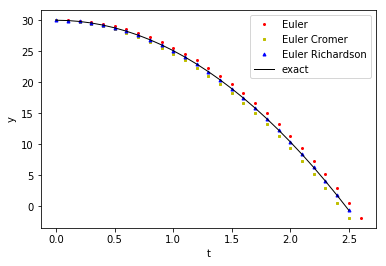

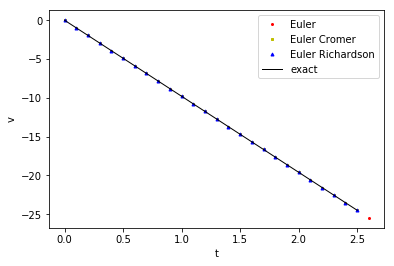

In [99]:
dt = 1e-1
t_e, y_e, v_e = falling(dt,diff=euler)
t_ec, y_ec, v_ec = falling(dt,diff=euler_cromer)
t_er, y_er, v_er = falling(dt,diff=euler_richardson)
y_ex = falling_exact(np.asarray(t_er))


plt.plot(t_e, y_e, c='r', marker='o', ms=2, ls='None', label='Euler')
plt.plot(t_ec, y_ec, c='y', marker='s', ms=2, ls='None', label='Euler Cromer')
plt.plot(t_er, y_er, c='blue', marker='^', ms=3, ls='None', label='Euler Richardson')
plt.plot(t_er, y_ex, c='black',lw=1, label='exact' )
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

plt.plot(t_e, v_e, c='r', marker='o', ms=2, ls='None', label='Euler')
plt.plot(t_ec, v_ec, c='y', marker='s', ms=2, ls='None', label='Euler Cromer')
plt.plot(t_er, v_er, c='blue', marker='^', ms=3, ls='None', label='Euler Richardson')
plt.plot(t_er, -9.8*np.asarray(t_er), c='black',lw=1, label='exact' )
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.show()

### c) harmonic oscillator

Exact Solution:
\begin{eqnarray}
x(t) &=& -cos(t) \\
v(t) &=& sin(t) 
\end{eqnarray}

In [ ]:
fa_ho = lambda x,v,t: -x

def ho(n,dt,x0=1,v0=0,t0=0,fa=fa_ho,diff=euler):
    t = np.zeros(n)
    x = np.zeros(n)
    v = np.zeros(n)
    t[0], x[0], v[0] =t0, x0, v0
    for i in range(1,n+1):
        t[i], x[i], v[i] = diff(t[i-1],x[i-1],v[i-1],dt,fa=fa_ho)
    return t,x,v

t1,x1,v1 = ho(32,np.pi/4,diff=euler)
t2,x2,v2 = ho(32,np.pi/4,diff=euler_cromer)
t3,x3,v3 = ho(32,np.pi/4,diff=euler_richardson)

plt.plot(t1,x1,c='r',marker='o',ms=2,label='Euler')
plt.plot(t2,x2,c='y',marker='o',ms=2,label='Euler Cromer')
plt.plot(t3,x3,c='b',marker='o',ms=2,label='Euler Richardson')
plt.legend()
plt.show()

# plt.plot(t1,x1,c='r',marker='o',ms=2,label='Euler')
plt.plot(t2,x2,c='y',marker='o',ms=2,label='Euler Cromer')
plt.plot(t3,x3,c='b',marker='o',ms=2,label='Euler Richardson')
plt.legend()
plt.show()

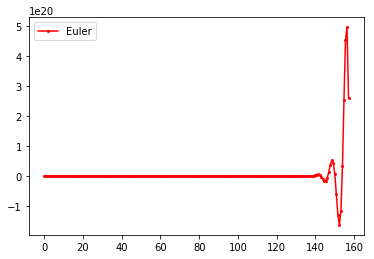

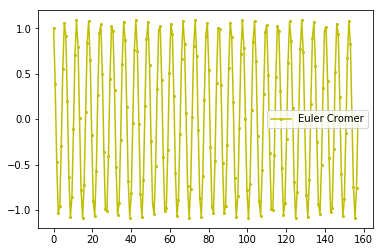

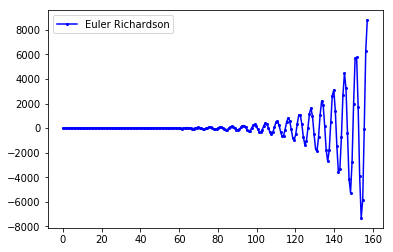

In [108]:
t1,x1,v1 = ho(201,np.pi/4,diff=euler)
t2,x2,v2 = ho(201,np.pi/4,diff=euler_cromer)
t3,x3,v3 = ho(201,np.pi/4,diff=euler_richardson)

plt.plot(t1,x1,c='r',marker='o',ms=2,label='Euler')
plt.legend()
plt.show()
plt.plot(t2,x2,c='y',marker='o',ms=2,label='Euler Cromer')
plt.legend()
plt.show()
plt.plot(t3,x3,c='b',marker='o',ms=2,label='Euler Richardson')
plt.legend()
plt.show()

# plt.plot(t1,x1,c='r',marker='o',ms=2,label='Euler')
# plt.plot(t2,x2,c='y',marker='o',ms=2,label='Euler Cromer')
# # plt.plot(t3,x3,c='b',marker='o',ms=2,label='Euler Richardson')
# plt.legend()
# plt.show()

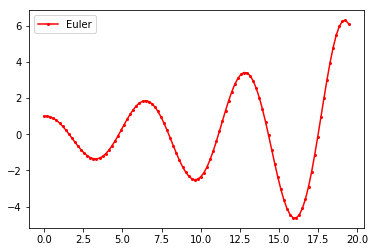

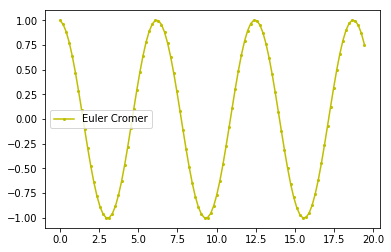

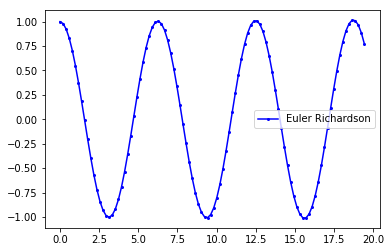

In [109]:
dt = np.pi/16
n = 100
t1,x1,v1 = ho(n,dt,diff=euler)
t2,x2,v2 = ho(n,dt,diff=euler_cromer)
t3,x3,v3 = ho(n,dt,diff=euler_richardson)

plt.plot(t1,x1,c='r',marker='o',ms=2,label='Euler')
plt.legend()
plt.show()
plt.plot(t2,x2,c='y',marker='o',ms=2,label='Euler Cromer')
plt.legend()
plt.show()
plt.plot(t3,x3,c='b',marker='o',ms=2,label='Euler Richardson')
plt.legend()
plt.show()

In [129]:
dt = np.pi/16
n = 100
t1,x1,v1 = ho(n,dt,diff=euler)
t2,x2,v2 = ho(n,dt,diff=euler_cromer)
t3,x3,v3 = ho(n,dt,diff=euler_richardson)

def get_dt(n=100,diff=euler,accuracy=1e-5,tend=np.pi):
    err = 1
    while(err>=accuracy):
        dt = tend/n
        t,x,v = ho(n,dt,diff=diff)
        n = np.int(n*1.05)
        err = np.abs(x[-1]+1)
    return dt, err

dt1, err1 = get_dt(diff=euler)
dt2, err2 = get_dt(diff=euler_cromer)
dt3, err3 = get_dt(diff=euler_richardson)

line = '{:20s} {:8.2e} {:8.2e}'
print('{:^20s} {:^8s} {:^8s}'.format('Method','\u0394t', 'Error'))
print(line.format('Euler',dt1, err1))
print(line.format('Euler Cromer',dt2, err2))
print(line.format('Euler Richardson',dt3, err3))

       Method           Δt     Error  
Euler                6.13e-06 9.63e-06
Euler Cromer         3.14e-02 2.02e-06
Euler Richardson     4.38e-03 9.52e-06


### d) A modification algorithm
From above results, Euler-Cromer is better than the Euler algorithm.  

Because the acceleration is a constant for a freely falling body with air resistence, the is no error with difference method. We just simply choose Euler method for computing velocity. From exact solution
\begin{eqnarray}
y(t) &=& y(0) + v(t)t - {1\over 2} g t^2 \\
y(t) &=& y(0) + {1\over 2} (v(0)+v(t))t
\end{eqnarray}
we can get relation of location between arbitary time $t_1$ and $t_2$
\begin{eqnarray}
y(t_2) = y(t_1) + {1\over 2} (v(t_1) + v(t_2)) (t_2 - t_1)
\end{eqnarray}
Let $t_{n+1} = t_2 , t_n = t_1, \Delta t = (t_2 - t_1)$, we get
\begin{eqnarray}
y_{n+1} &=& y_n + {1\over 2} (v_{n+1} + v_n ) \Delta t \\
y_{n+1} &=& y_n + v_{mid} \Delta t \\
v_{mid} &=& v_{n + {1\over 2}}
\end{eqnarray}

A modification algorithm for free falling body without air resistance would be
\begin{eqnarray}
v_{n+1} &=& v_n + a_n \Delta t \\
v_{mid} &=& v_n + a_n {\Delta t\over 2} \\
y_{n+1} &=& y_n + v_{mid} \Delta t 
\end{eqnarray}

### e) Write a subroutine to observe and visualize the position of the falling object at equal time intervals. Is the distance that the object has travelled over equal time intervals equal?

## 4. Trajectory of a shot

Differential equation:
\begin{eqnarray}
{d v_x \over dt} &=& - C v v_x \\
{d v_y \over dt} &=& -g - Cv v_y \\
C &=& {k_2 \over m}
\end{eqnarray}
where $k_2$ is coefficence of air resistence and m is mass.

### a) Considering no air resistance, the differential equation is
\begin{eqnarray}
{d v_x \over dt} &=& 0 \\
{d v_y \over dt} &=& -g
\end{eqnarray}

1.000074275272703 0.7869689597242432


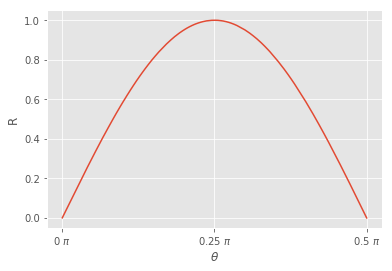

In [174]:
# theta 
import matplotlib.ticker as tck

v0 = 22

def get_R(theta,dt=0.001,y0=0, v0=22):
    vx = v0*np.cos(theta)
    vy = v0*np.sin(theta)
    t,x,v=falling(dt,t0=0,y0=y0,v0=vy,diff=euler_richardson)
    sy = vx*t[-1]
    return sy/(v0**2)*9.8

thetas = np.linspace(0,np.pi/2,1001)

Rs = np.asarray([get_R(th) for th in thetas])

idx = Rs.argmax()
Rmax = Rs[idx]
thmax = thetas[idx]
print(Rmax, thmax)

fig, ax = plt.subplots()
ax.plot(thetas/np.pi, Rs)
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.25))
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('R')
plt.show()

In [177]:
np.asarray([np.array([1,2]),np.array([3,4])])

array([[1, 2],
       [3, 4]])

### b) thrown from a height h at an angle $\theta_0$

1.0399709191579047 0.7696902001294994


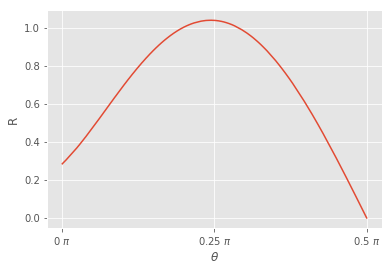

-0.12960744392162812
-0.08431697582445574


In [175]:
Rs = np.asarray([get_R(th,y0=2) for th in thetas])

idx = Rs.argmax()
Rmax = Rs[idx]
thmax = thetas[idx]
print(Rmax, thmax)

fig, ax = plt.subplots()
ax.plot(thetas/np.pi, Rs)
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.25))
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('R')
plt.show()

th1 = thmax*1.03
R1 = get_R(th1,y0=2)
print((R1-Rmax)/Rmax*100)

th2 = thmax*0.97
R2 = get_R(th2,y0=2)
print((R2-Rmax)/Rmax*100)

### c) Considering air resistance

0.044999572228553 0.3926990816987242


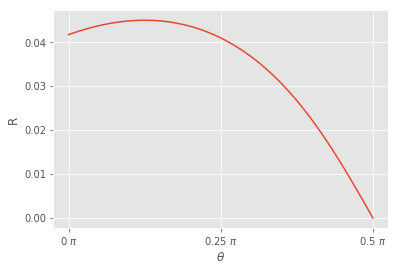

In [195]:
def fa_air(C=0.1,g=9.8):
    def f(x,v,t):
        return np.array([0,-g])-C*(v*v).sum()*v
    return f
fa_air = lambda C=0.1,g=9.8: (lambda x,v,t: np.array([0,-g])-C*(v*v).sum()*v)

def trajectory(v0,x0=np.array([0,3.3]),dt=0.001,C=0.1,t0=0,g=9.8):
    # v0, x0 are (2,) shape array, correponding x and y directions. 
    t, x, v = [t0], [x0], [v0]  
    fa = fa_air(C=C,g=g)
    while(x[-1][1]>0 or t[-1] == 0):
        t1,x1,v1=euler_richardson(t[-1],x[-1],v[-1],dt,fa=fa)
        t += [t1]
        x += [x1]
        v += [v1]
    return t, x, v

def get_R_air(th,vnorm=30,x0=np.array([0,3.3]),dt=0.001,C=0.1,t0=0,g=9.8):
    v0 = np.array([vnorm*np.cos(th),vnorm*np.sin(th)])
    t, x, v = trajectory(v0,x0=x0,dt=dt,C=C,t0=t0,g=g)
    return x[-1][0]/vnorm**2*g

thetas = np.linspace(0,np.pi/2,101)

Rs = np.asarray([get_R_air(th) for th in thetas])

idx = Rs.argmax()
Rmax = Rs[idx]
thmax = thetas[idx]
print(Rmax, thmax)

fig, ax = plt.subplots()
ax.plot(thetas/np.pi, Rs)
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.25))
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('R')
plt.show()

In [196]:
th1 = thmax*1.03
R1 = get_R_air(th1)
print((R1-Rmax)/Rmax*100)

th2 = thmax*0.97
R2 = get_R_air(th2)
print((R2-Rmax)/Rmax*100)

-0.009979097871608956
-0.004427863107190421


0.35743974497133413 0.6754424205218056


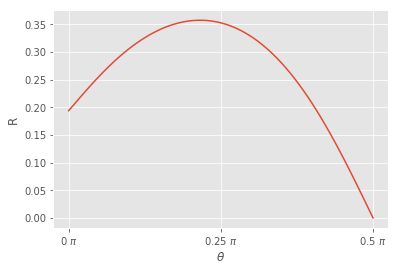

In [197]:
thetas = np.linspace(0,np.pi/2,101)

Rs = np.asarray([get_R_air(th,C=0.002) for th in thetas])

idx = Rs.argmax()
Rmax = Rs[idx]
thmax = thetas[idx]
print(Rmax, thmax)

fig, ax = plt.subplots()
ax.plot(thetas/np.pi, Rs)
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.25))
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('R')
plt.show()

### d) Comparsion

In [201]:
C = 0.03
dt = 0.0001
t1, x1, v1 = trajectory(np.array([0,0]),x0=np.array([0,13]),dt=dt,C=C)
t2, x2, v2 = trajectory(np.array([30,0]),x0=np.array([0,13]),dt=dt,C=C)
print(t1[-1],t2[-1])

2.3125000000004556 2.509700000000872


In [200]:
C = 0.055
dt = 0.0001
t1, x1, v1 = trajectory(np.array([0,0]),x0=np.array([0,13]),dt=dt,C=C)
t2, x2, v2 = trajectory(np.array([30,0]),x0=np.array([0,13]),dt=dt,C=C)
print(t1[-1],t2[-1])

2.6574000000011835 2.8228000000015325


## 5. Motion of a linear oscillator

## 6. Numerical Intergration

\begin{eqnarray}
I_1 &=& \int_2^4{dx log(x)},\varepsilon=10^{-7} \\
I_2 &=& \int_0^1{dx e^{-x^2}},\varepsilon=10^{-9} \\
I_3 &=& \int_{1/2}^{5/2}{\frac{dx}{1+x^2}},\varepsilon=10^{-11} \\
\end{eqnarray}

\begin{eqnarray}
f_1 &=& \log{(x)} \\
f_2 &=& e^{-x^2} \\
f_3 &=& \frac{1}{1+x^2} 
\end{eqnarray}

According to asymptotic error formulate
$$I(f) \approx T_n(f)-\frac{h^2}{12}[f'(b)-f'(a)]$$
$$I(f) \approx S_n(f)-\frac{h^4}{180}[f'''(b)-f'''(a)]$$
we can derive that:
$$E_{1T}=\frac{1}{12n^2},\ E_{1S}=\frac{-7}{360n^4}$$

$$E_{2T}=\frac{e}{6n^2},\ E_{1S}=\frac{e}{45n^4}$$

$$E_{3T}=\frac{11456}{63075n^2},\ E_{1S}=\frac{685406\times 4^5}{29^4\times 5^5 n^4}$$
n must satisfy the following conditions to achieve the corresponding accuracy
$$n_{1T}\geq 913,\ n_{1S}\geq 21$$
$$n_{2T}\geq 21285,\ n_{2S}\geq 89$$
$$n_{3T}\geq 134769,\ n_{3S}\geq 423$$